<a href="https://colab.research.google.com/github/ttjh1234/Study_MLDL/blob/main/chapter02_solo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#생선 분류 문제

##혼자 해보기 ! 

책에서 나오는 직접 평균과 표준편차를 구해서 하는 표준화를 사용하지 않고,

이전에 배웠었던 **sklearn**의 **preprocessing**을 사용하여 진행해보겠다.

모델링 방법은 **K-최근접 이웃 방법**을 사용하고, 책과 동일하게 **시드값**으로 **42**를 사용하겠다.


###데이터 준비

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
fish_data=np.column_stack((fish_length,fish_weight))
print(fish_data[:5])
fish_target=np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
[1. 1. 1. 1. 1.]


###데이터 전처리

In [4]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(fish_data).transform(fish_data)
print(x[:5])

[[-0.16326134 -0.62350364]
 [-0.07448421 -0.47571019]
 [-0.05475596 -0.32175867]
 [ 0.19184717 -0.25094097]
 [ 0.19184717 -0.04464594]]


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,fish_target,stratify=fish_target,random_state=42)
print(x_train.shape,y_train.shape)
print(np.unique(y_train,return_counts=True))

(36, 2) (36,)
(array([0., 1.]), array([10, 26]))


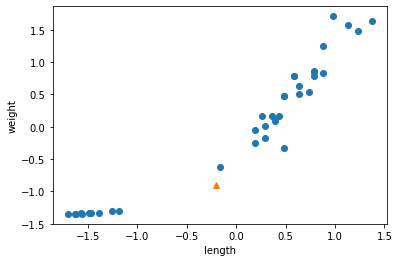

In [10]:
new=([25,150]-fish_data.mean(axis=0))/fish_data.std(axis=0)

import matplotlib.pyplot as plt

plt.scatter(x_train[:,0],x_train[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

###데이터 모델링 및 평가

In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.score(x_test,y_test)

1.0

In [8]:
print(kn.predict([new]))

[1.]


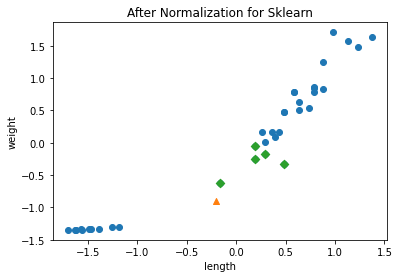

In [9]:
distances,indexes=kn.kneighbors([new])

plt.scatter(x_train[:,0],x_train[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(x_train[indexes,0],x_train[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('After Normalization for Sklearn')
plt.show()